# LDA

1. Introduction to LDA for Dimensionality Reduction
Objective: Understand the basic principles of LDA and apply it to reduce the dimensionality of a simple classification dataset.

Load the Dataset

In [1]:
import pandas as pd

# Load dataset from your file path
iris = pd.read_csv('/content/iris.csv')
X = iris.iloc[:, :-1]  # Features (first 4 columns)
y = iris.iloc[:, -1]   # Target (last column for species)


Data Standardisation

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Apply LDA

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


Visulization

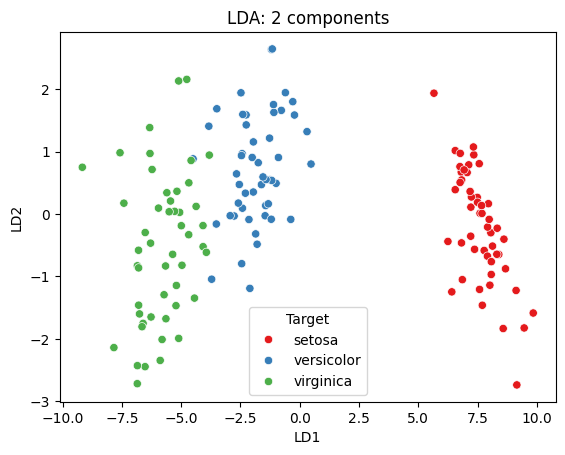

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['Target'] = y

# Plot the LDA components
sns.scatterplot(x='LD1', y='LD2', hue='Target', data=lda_df, palette='Set1')
plt.title('LDA: 2 components')
plt.show()


Compare LDA with PCA

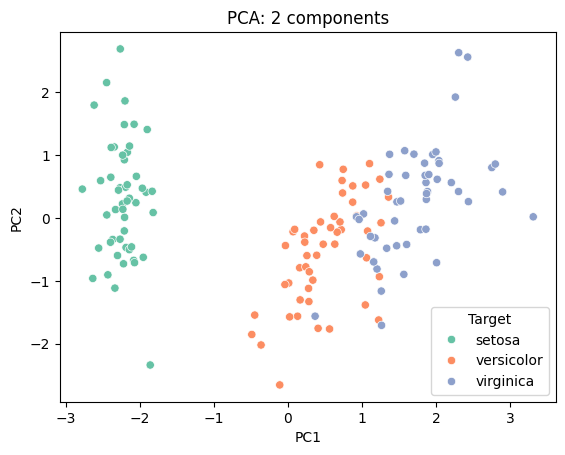

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Plot PCA components
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='Set2')
plt.title('PCA: 2 components')
plt.show()


2. LDA for Classification
Objective: Learn how LDA can be used as a classifier by applying it to a multi-class classification problem.

Load the Data

In [7]:
import pandas as pd
from zipfile import ZipFile

# Load dataset from zip file
with ZipFile('/content/wine.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Read the dataset
wine = pd.read_csv('//content/winequality-red.csv')
X = wine.iloc[:, :-1]  # Features (first 13 columns)
y = wine.iloc[:, -1]   # Target (last column for wine class)


Split the Data

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Train an LDA Model

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

Evaluate the Model

In [11]:
# Compute evaluation metrics with zero_division parameter
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.56
Precision: 0.53
Recall: 0.56
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  2   0   9   6   0   0]
 [  0   0 145  44   6   0]
 [  1   0  69 104  26   0]
 [  0   0   3  36  22   0]
 [  0   0   0   2   4   0]]


Compare the Logistic Regression

In [13]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming you have already loaded the dataset into X and y
# Example: X, y = load_wine(return_X_y=True)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model with increased max_iter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Compute evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print evaluation metrics
print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')
print(f'Logistic Regression Precision: {precision_logreg:.2f}')
print(f'Logistic Regression Recall: {recall_logreg:.2f}')
print('Logistic Regression Confusion Matrix:\n', conf_matrix_logreg)


Logistic Regression Accuracy: 0.56
Logistic Regression Precision: 0.53
Logistic Regression Recall: 0.56
Logistic Regression Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 146  49   0   0]
 [  0   0  73 109  18   0]
 [  0   0   4  41  16   0]
 [  0   0   0   2   4   0]]


Visuvalize the Boundaries

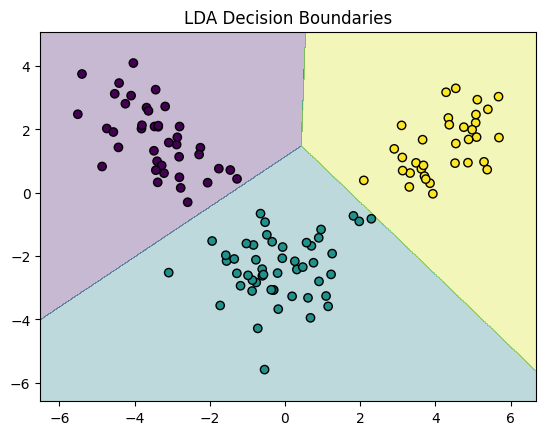

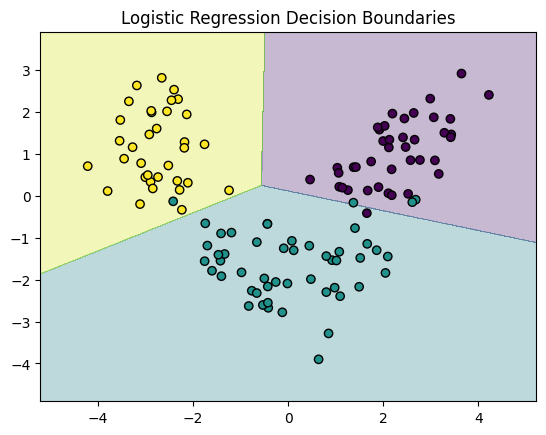

Logistic Regression Accuracy: 0.96
Logistic Regression Precision: 0.97
Logistic Regression Recall: 0.96
Logistic Regression Confusion Matrix:
 [[17  2  0]
 [ 0 21  0]
 [ 0  0 14]]


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# 1. Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# 2. Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Standardize the data (mean = 0, std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Reduce dataset to 2D using LDA
lda_2d = LDA(n_components=2)
X_train_lda = lda_2d.fit_transform(X_train_scaled, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and data points
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# 5. Train a new LDA model on the 2D-reduced data
lda_model = LDA()
lda_model.fit(X_train_lda, y_train)

# Plot decision boundaries for LDA
plot_decision_boundaries(X_train_lda, y_train, lda_model, "LDA Decision Boundaries")

# 6. Reduce dataset to 2D using PCA for Logistic Regression
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# 7. Train Logistic Regression on the 2D-reduced data
logreg = LogisticRegression(max_iter=2000)  # Increased max_iter to 2000
logreg.fit(X_train_pca, y_train)

# Plot decision boundaries for Logistic Regression
plot_decision_boundaries(X_train_pca, y_train, logreg, "Logistic Regression Decision Boundaries")

# Evaluate the Logistic Regression model on test data (optional)
X_test_pca = pca.transform(X_test_scaled)
y_pred_logreg = logreg.predict(X_test_pca)

# Compute evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print(f'Logistic Regression Accuracy: {accuracy_logreg:.2f}')
print(f'Logistic Regression Precision: {precision_logreg:.2f}')
print(f'Logistic Regression Recall: {recall_logreg:.2f}')
print('Logistic Regression Confusion Matrix:\n', conf_matrix_logreg)
